In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import statsmodels.formula.api as smf

In [ ]:
data = pd.read_excel("/content/ToyotaCorolla - MLR.xlsx")
data

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [ ]:
data.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [ ]:
data.isnull().sum()

,0
Price,0
Age_08_04,0
KM,0
Fuel_Type,0
HP,0
Automatic,0
cc,0
Doors,0
Cylinders,0
Gears,0


In [ ]:
data1 = data.drop('Fuel_Type',axis=1,inplace=True)


In [ ]:
data.head()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,90,0,2000,3,4,5,1165
1,13750,23,72937,90,0,2000,3,4,5,1165
2,13950,24,41711,90,0,2000,3,4,5,1165
3,14950,26,48000,90,0,2000,3,4,5,1165
4,13750,30,38500,90,0,2000,3,4,5,1170


<Axes: >

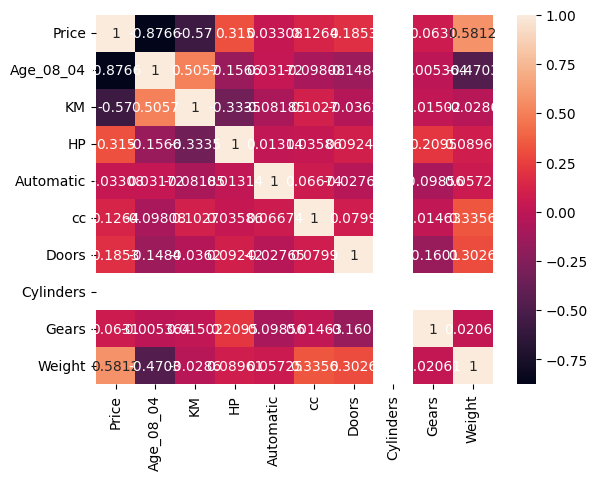

In [ ]:
sns.heatmap(data.corr() , annot=True, fmt='.4g')

In [ ]:
data.columns

Index(['Price', 'Age_08_04', 'KM', 'HP', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Weight'],
      dtype='object')

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [ ]:
data = pd.read_excel("/content/ToyotaCorolla - MLR.xlsx")

In [ ]:
X = data.drop(columns="Price")
y = data["Price"]


In [ ]:
numeric = ['Age_08_04','KM','HP','Automatic','cc','Doors','Cylinders','Gears','Weight']
cat = ['Fuel_Type']
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric),
    ('cat', OneHotEncoder(drop='first'), cat)
])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)


In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

models = {
    'OLS': LinearRegression(),          # No regularization
    'Ridge': Ridge(alpha=1.0),         # L2 regularization
    'Lasso': Lasso(alpha=0.1)          # L1 regularization
}


In [ ]:
pipelines = {
    name: Pipeline([('pre', preprocessor), ('reg', model)])
    for name, model in models.items()
}


In [ ]:

for name, pipe in pipelines.items():
    pipe.fit(X_train, y_train)


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

for name, pipe in pipelines.items():
    y_pred = pipe.predict(X_test)
    print(f"{name}:\n  R² = {r2_score(y_test, y_pred):.4f},  MSE = {mean_squared_error(y_test, y_pred):.2f}")


OLS:
  R² = 0.1315,  MSE = 10061776.55
Ridge:
  R² = 0.2819,  MSE = 8320044.61
Lasso:
  R² = 0.1409,  MSE = 9953827.98


In [ ]:
from sklearn.linear_model import ElasticNet
pipe_en = Pipeline([
    ('pre', preprocessor),
    ('reg', ElasticNet(alpha=0.1, l1_ratio=0.5))
])
pipe_en.fit(X_train, y_train)



Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Age_08_04', 'KM', 'HP',
                                                   'Automatic', 'cc', 'Doors',
                                                   'Cylinders', 'Gears',
                                                   'Weight']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['Fuel_Type'])])),
                ('reg', ElasticNet(alpha=0.1))])

# **interview** **questions**

# **1**

normalization and standardization make your feature comparable and model training more stable normalization for range bound scaling . standardization for centering and variance control

Prevents variables with large scales from dominating model training

# **2**

Multicollinearity occurs when independent variables are highly correlated, which inflates coefficient variances and undermines the reliability of inferences.
can be detected via correlation or VIF, and addressed through variable selection, regularization (e.g., Ridge, Lasso), dimensionality reduction (PCR/PLS), or using orthogonal predictors.